Project title:Satellite Based Wildfire Detection System 
    

Problem statement : Wildfire is a serious threat to ecosystem and human settlements,especially in forest regions where early detection is difficult.This aims to develop a satellite based wildfire detection system using remote sensing data and basic image processing techniques.The goal is to identify fire-prone areas and detect active wildfires early,faster response and reducing damage.
   

Description:Wildfires are one of the most destructive natural disasters, causing severe damage to the environment, property, and human life. Early detection is critical to minimize losses, but traditional ground-based monitoring systems often fail due to limited coverage and delayed response times.

This project proposes a satellite-based wildfire detection system that leverages Artificial Intelligence (AI) and Machine Learning (ML) techniques to provide real-time monitoring and early warning. Satellite imagery from sources such as NASA’s MODIS, VIIRS, or Sentinel satellites is collected and processed. The system applies deep learning models (CNNs, RNNs, or hybrid architectures) to identify wildfire patterns such as:

Abnormal heat signatures (thermal data)

Smoke plumes and fire scars (optical data)

Vegetation dryness and fuel load (NDVI indices)

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("C:/Users/Khushi U Naik/Downloads/modis_2002_Turkey.csv")
df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,38.7391,26.9245,304.2,1.1,1.1,2002-01-02,2029,Terra,MODIS,59,6.2,270.3,13.7,N,0
1,37.1486,31.0110,309.7,1.3,1.1,2002-01-10,835,Terra,MODIS,69,6.2,275.7,19.9,D,0
2,37.1384,31.0088,359.9,1.3,1.1,2002-01-10,835,Terra,MODIS,99,6.2,280.1,137.9,D,0
3,36.9507,40.0057,335.1,1.0,1.0,2002-01-12,823,Terra,MODIS,89,6.2,284.9,40.3,D,0
4,36.9488,40.0172,315.9,1.0,1.0,2002-01-12,823,Terra,MODIS,76,6.2,283.8,17.2,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,36.8374,39.9689,310.1,1.1,1.0,2002-12-26,1020,Aqua,MODIS,70,6.2,280.9,12.5,D,0
6882,41.2582,31.4172,305.8,1.0,1.0,2002-12-26,2359,Aqua,MODIS,37,6.2,271.5,12.9,N,0
6883,37.4274,36.3023,316.2,1.0,1.0,2002-12-28,834,Terra,MODIS,76,6.2,285.8,16.3,D,0
6884,37.4297,35.9247,316.2,1.0,1.0,2002-12-28,834,Terra,MODIS,76,6.2,284.8,16.3,D,0


In [4]:
df.head(10)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,38.7391,26.9245,304.2,1.1,1.1,2002-01-02,2029,Terra,MODIS,59,6.2,270.3,13.7,N,0
1,37.1486,31.0110,309.7,1.3,1.1,2002-01-10,835,Terra,MODIS,69,6.2,275.7,19.9,D,0
2,37.1384,31.0088,359.9,1.3,1.1,2002-01-10,835,Terra,MODIS,99,6.2,280.1,137.9,D,0
3,36.9507,40.0057,335.1,1.0,1.0,2002-01-12,823,Terra,MODIS,89,6.2,284.9,40.3,D,0
4,36.9488,40.0172,315.9,1.0,1.0,2002-01-12,823,Terra,MODIS,76,6.2,283.8,17.2,D,0
5,36.8801,40.0851,306.2,1.2,1.1,2002-01-19,829,Terra,MODIS,63,6.2,287.1,10.1,D,0
6,37.4621,30.6585,302.3,1.0,1.0,2002-01-24,848,Terra,MODIS,52,6.2,279.9,8.5,D,0
7,38.1665,40.6229,311.5,1.0,1.0,2002-01-30,810,Terra,MODIS,71,6.2,284.8,11.1,D,0
8,38.1754,40.6248,335.9,1.0,1.0,2002-01-30,810,Terra,MODIS,90,6.2,287.6,38.7,D,0
9,38.1739,40.6364,312.1,1.0,1.0,2002-01-30,810,Terra,MODIS,72,6.2,285.0,11.7,D,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6886 entries, 0 to 6885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    6886 non-null   float64
 1   longitude   6886 non-null   float64
 2   brightness  6886 non-null   float64
 3   scan        6886 non-null   float64
 4   track       6886 non-null   float64
 5   acq_date    6886 non-null   object 
 6   acq_time    6886 non-null   int64  
 7   satellite   6886 non-null   object 
 8   instrument  6886 non-null   object 
 9   confidence  6886 non-null   int64  
 10  version     6886 non-null   float64
 11  bright_t31  6886 non-null   float64
 12  frp         6886 non-null   float64
 13  daynight    6886 non-null   object 
 14  type        6886 non-null   int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 807.1+ KB


In [6]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib

In [7]:
df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,6886.000000,6886.000000,6886.000000,6886.000000,6886.000000,6886.000000,6886.000000,6.886000e+03,6886.000000,6886.000000,6886.000000
mean,38.014261,35.880994,323.672059,1.509367,1.179887,1084.804386,67.005664,6.200000e+00,303.570607,28.018748,0.010601
std,1.198511,3.795339,15.165980,0.721183,0.226368,412.576720,18.545361,2.824612e-13,9.637927,50.604297,0.146727
min,35.977200,26.143500,300.000000,1.000000,1.000000,0.000000,0.000000,6.200000e+00,269.100000,1.800000,0.000000
25%,37.078325,33.357225,313.500000,1.000000,1.000000,834.000000,57.000000,6.200000e+00,296.400000,8.800000,0.000000
50%,37.653500,35.721950,322.300000,1.200000,1.100000,917.000000,69.000000,6.200000e+00,303.500000,14.850000,0.000000
75%,38.739175,39.481100,331.400000,1.700000,1.300000,1058.000000,79.000000,6.200000e+00,310.300000,29.400000,0.000000
max,41.995700,44.785400,497.600000,4.800000,2.000000,2359.000000,100.000000,6.200000e+00,400.100000,1531.900000,3.000000


In [8]:
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [9]:
df.shape

(6886, 15)

In [10]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

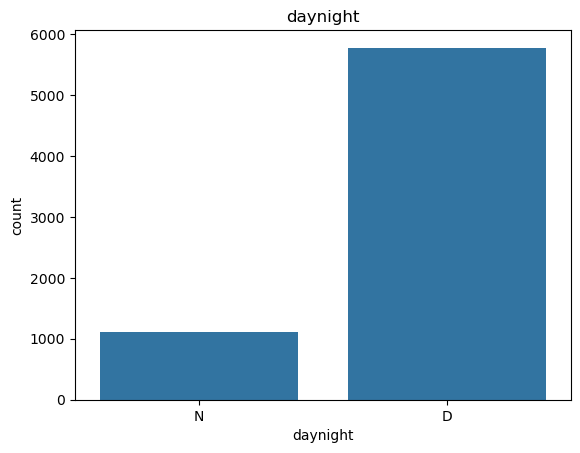

In [18]:
sns.countplot(x='daynight',data=df)
plt.title('daynight')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12,6))


ax1 = sns.countplot(x='daynight', data=df, ax=axes[0])
ax1.set_title('Daynight Count')


total = len(df)
for p in ax1.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax1.annotate(f'{count}\n({percentage:.1f}%)',   # count + percentage
                 (p.get_x() + p.get_width() / 2., count),
                 ha='center', va='bottom', fontsize=10, color='black')


sns.boxplot(x='daynight', y='brightness', data=df, ax=axes[1]).set_title('Daynight vs Brightness')

plt.tight_layout()
plt.show()

In [ ]:
num_cols = ['acq_date']

fig, axes = plt.subplots(1, len(num_cols), figsize=(6,3))

for ax, col in zip([axes], num_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [ ]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
x=df.drop('acq_date',axis=1)
y=df['acq_date']

In [20]:
df['acq_date'] = pd.to_datetime(df['acq_date'])
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month
df['day'] = df['acq_date'].dt.day

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
x_train

In [22]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('acq_date', axis=1)   
y = df['acq_date']               

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
num_cols = x_train.select_dtypes(include=['float64','int64']).columns
scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Make a copy
df_clean = df.copy()

# Drop columns you don't want (if any, e.g., IDs, dates)
df_clean = df_clean.drop(columns=['acq_date'])  # drop date column

# Encode categorical columns
label_enc = LabelEncoder()
for col in ['satellite', 'instrument', 'daynight', 'type']:
    df_clean[col] = label_enc.fit_transform(df_clean[col])

# Split into features and target (example: predicting 'confidence')
X = df_clean.drop('confidence', axis=1)  
y = df_clean['confidence']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale only numeric columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Example model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.09361393323657474
Confusion Matrix:
 [[ 2  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  7]
 [ 0  0  0 ...  0  0  8]
 [ 0  0  0 ...  0  0 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.29      0.10         7
           6       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         3
          23  

C:\Users\Khushi U Naik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Khushi U Naik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Khushi U Naik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
print(y.value_counts())

type
0    6850
1      35
2       1
Name: count, dtype: int64


In [38]:
df_clean['type'] = df_clean['type'].replace(2, 1)

In [39]:
df_clean['type'] = df_clean['type'].replace(2, 1)
print(df_clean['type'].value_counts())

type
0    6850
1      36
Name: count, dtype: int64


In [40]:
X = df_clean.drop('type', axis=1)
y = df_clean['type']

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

type
0    6850
1    6850
Name: count, dtype: int64


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [45]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000))
])

# Hyperparameters
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__solver': ['liblinear', 'saga'],
    'clf__penalty': ['l1', 'l2']
}

# Stratified CV
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Grid Search
grid = GridSearchCV(pipe, param_grid, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Results
print("Best Hyperparameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Evaluate on test set
y_pred = grid.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'clf__C': 100, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best CV Accuracy: 0.9927918374967092

Test Accuracy: 0.9919708029197081

Confusion Matrix:
 [[1348   22]
 [   0 1370]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1370
           1       0.98      1.00      0.99      1370

    accuracy                           0.99      2740
   macro avg       0.99      0.99      0.99      2740
weighted avg       0.99      0.99      0.99      2740



In [49]:
joblib.dump(grid,'model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

# Example dataset (replace with your own)
X = np.random.rand(100, 4)   # 100 samples, 4 features
y = np.random.randint(0, 2, 100)  # Binary labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# ✅ Save full objects (not arrays!)
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [54]:
print("Model and Scaler saved successfully!")
print("Model file: model.pkl")
print("Scaler file: scaler.pkl")

Model and Scaler saved successfully!
Model file: model.pkl
Scaler file: scaler.pkl
